## Make granular date instead (using month)
## Calculate "time to read" (single human ( av(words) / [16 w/s] ) vs single processor (av(chars) / CPU) )

In [1]:
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

font = {'size'   : 15}
matplotlib.rc('font', **font)

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/Microprocessor_chronology")
soup = BeautifulSoup(r.text,"lxml")

In [3]:
dfs = []
for table in soup.findAll("table"):
    _df = pd.read_html(str(table),header=0)[0]
    _df.rename(columns={"Max clock (first version)":"Clock"},inplace=True)
    dfs.append(_df)
df = pd.concat(dfs)


df = df.loc[~pd.isnull(df["Clock"])]
df = df.loc[~pd.isnull(df["Date"])]

1980
2016


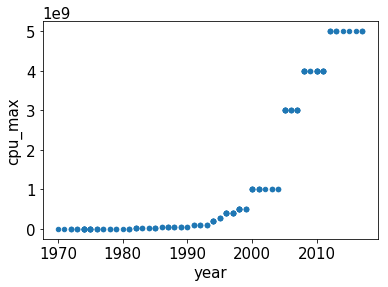

In [4]:
unit_map = {"GHz":1e9,"MHz":1e6,"kHz":1e3}
def get_unit(unit):    
    info = re.findall(r'(\w*Hz\w*)',unit)
    if len(info) > 0:
        return unit_map[info[0]]
    return None

def get_mag(unit):
    info = re.findall(r'(\d+)',str(unit))
    if len(info) > 0:
        return float(info[0])
    return None

df["cpu_unit"] = df["Clock"].apply(get_unit)
df["cpu"] = df["Clock"].apply(get_mag)

df = df.loc[df.cpu > 0]

df["cpu_norm"] = df["cpu"] * df["cpu_unit"]
df["year"] = df["Date"].apply(get_mag)

# Fill in any missing years
df = df.loc[~pd.isnull(df["year"])]
for yr in range(int(df.year.min()),int(df.year.max())+1):
    if yr in df.year.values:
        continue
    max_value = df.loc[df.year <= yr,"cpu_norm"].max()
    print(yr)
    df = df.append(dict(year=yr,cpu_norm=max_value),ignore_index=True)

df["cpu_max"] = np.nan
for i,row in df.iterrows():
    max_value = df.loc[df.year <= row.year,"cpu_norm"].max()
    df.loc[df.year == row.year,"cpu_max"] = max_value
    
df = df.loc[~pd.isnull(df["cpu_norm"])]


ax = df.plot.scatter(y="cpu_max",x="year")

In [5]:
# ax = df.plot.scatter(y="cpu_norm",x="year")
# ax.set_ylim(0,10)

In [6]:
def get_year(date):
    info = re.findall(r'\d+',date)
    if len(info) > 0:
        return info[0]
    return None

df_arxiv = pd.read_csv("https://arxiv.org/stats/get_monthly_submissions")
df_arxiv["year"] = df_arxiv["month"].apply(get_year)
df_arxiv['date'] = pd.to_datetime(df_arxiv['month'],format='%Y-%m')
df_arxiv

,month,submissions,historical_delta,year,date
0,1991-07,0,-2,1991,1991-07-01
1,1991-08,27,-1,1991,1991-08-01
2,1991-09,58,0,1991,1991-09-01
3,1991-10,76,0,1991,1991-10-01
4,1991-11,64,0,1991,1991-11-01
5,1991-12,78,0,1991,1991-12-01
6,1992-01,88,-105,1992,1992-01-01
7,1992-02,124,-10,1992,1992-02-01
8,1992-03,117,-3,1992,1992-03-01
9,1992-04,184,-41,1992,1992-04-01


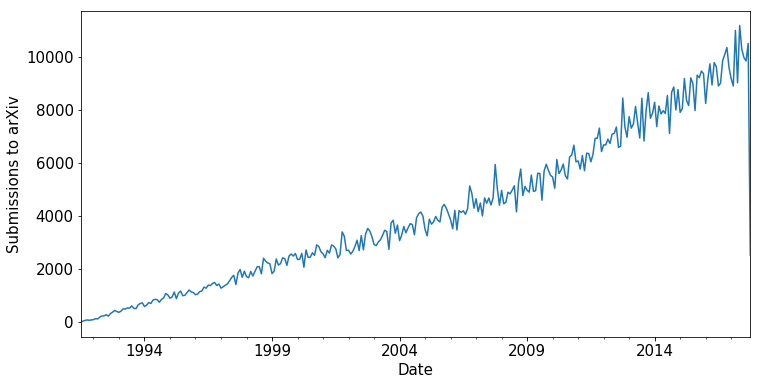

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
df_arxiv.plot(x="date",y="submissions",legend=False,ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Submissions to arXiv")

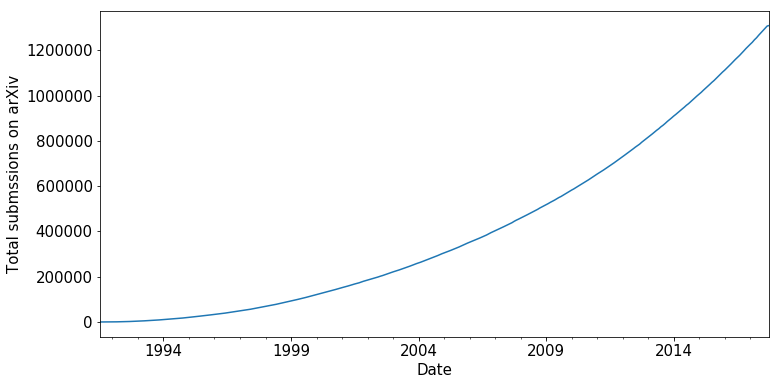

In [17]:
cpu_efficiency = 0.1
words_in_text = 3000
chars_per_word = 10
human_read_speed = 10
day = 86400

def find_cpu(yr):
    cpu = df.loc[df.year == int(yr),"cpu_max"].values
    if len(cpu) > 0:
        return cpu[0]
    return None

df_arxiv["cpu"] = df_arxiv["year"].apply(find_cpu)

df_arxiv["total_subs"] = np.nan 
for i,row in df_arxiv.iterrows():
    before_now = df_arxiv.date <= row.date
    total = df_arxiv.loc[before_now,"submissions"].sum()
    df_arxiv.loc[ df_arxiv.date == row.date,"total_subs"] = total
    
fig,ax = plt.subplots(figsize=(12,6))
df_arxiv.plot(x="date",y="total_subs",legend=False,ax=ax)
ax.set_ylabel("Total submssions on arXiv")
ax.set_xlabel("Date")

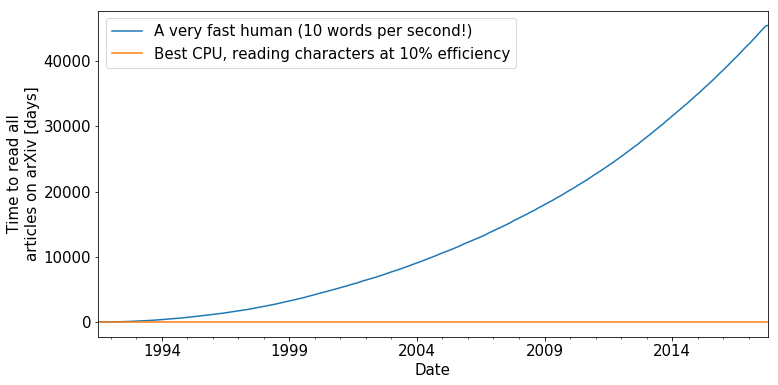

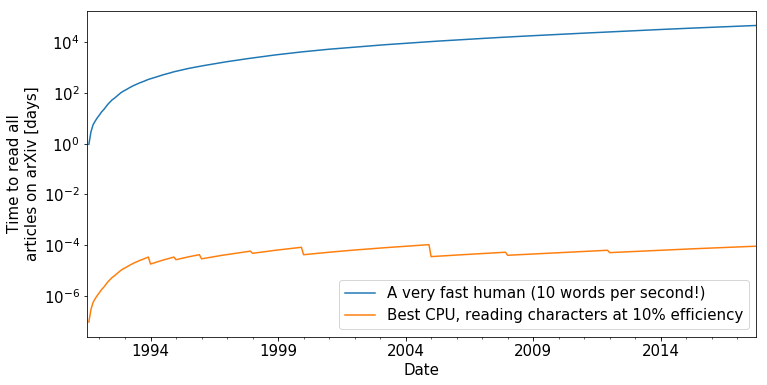

In [21]:
df_arxiv["time_to_read_cpu"] = (words_in_text * (df_arxiv["total_subs"] / df_arxiv["cpu"]) / cpu_efficiency) / day
df_arxiv["time_to_read_human"] =  (chars_per_word * words_in_text * df_arxiv["total_subs"] / human_read_speed) / day

fig,ax = plt.subplots(figsize=(12,6))
df_arxiv.plot(x="date",y="time_to_read_human",label="A very fast human (%d words per second!)" % human_read_speed,ax=ax)
df_arxiv.plot(x="date",y="time_to_read_cpu",label="Best CPU, reading characters at %d%% efficiency" % (100*cpu_efficiency),ax=ax)
#ax.semilogy()
ax.set_ylabel("Time to read all\narticles on arXiv [days]")
ax.set_xlabel("Date")

fig,ax = plt.subplots(figsize=(12,6))
df_arxiv.plot(x="date",y="time_to_read_human",label="A very fast human (%d words per second!)" % human_read_speed,ax=ax)
df_arxiv.plot(x="date",y="time_to_read_cpu",label="Best CPU, reading characters at %d%% efficiency" % (100*cpu_efficiency),ax=ax)
ax.semilogy()
ax.set_ylabel("Time to read all\narticles on arXiv [days]")
ax.set_xlabel("Date")

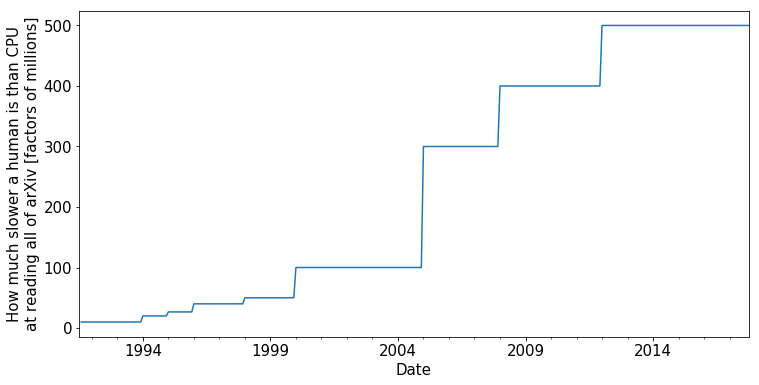

In [20]:
df_arxiv["cpu_over_human"] = 1e-6 * df_arxiv["time_to_read_human"] / df_arxiv["time_to_read_cpu"] 

fig,ax = plt.subplots(figsize=(12,6))
df_arxiv.plot(x="date",y="cpu_over_human",ax=ax,legend=False)
#ax.semilogy()
ax.set_ylabel("How much slower a human is than CPU\nat reading all of arXiv [factors of millions]")
ax.set_xlabel("Date")